In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# データダウンロード


In [ ]:
import os
os.chdir("/content/drive/My Drive/NTTcompetition/")

In [ ]:
!pwd

/content/drive/My Drive/NTTcompetition


In [ ]:
columns=["time_stamp", 'sweet_fondness', 'spicy_fondness', 'salty_fondness', 'seasoned_flavour_fondness', 'bitter_fondness', 'light_seasoning_fondness', 'heavy_seasoning_fondness', 'soya_bean_fondness', 'vegetable_fondness', 'meat_fondness','oily_fondness','health_awareness', 'fake_meat_impression', 'fake_meat_cognition', 'environmental_awareness', 'mogi_price','mogi_brand_cognition', 'mogi_package_impression', 'mogi_appetite', 'mogi_willingness_to_buy', 'mogi_dryness', 'mogi_stickiness', 'mogi_juicy', 'mogi_saltiness', 'mogi_seasoned_flavour', 'mogi_flavour_heaviness', 'mogi_flavour_lightness', 'mogi_soya_taste', 'mogi_soya_smell','mogi_meat_similarity', 'mogi_meat_taste_similarity','mogi_meat_texture_similarity','mogi_meat_smell_similarity', 'mogi_deliciousness', 'mujirushi_price','mujirushi_brand_cognition', 'mujirushi_package_impression', 'mujirushi_appetite', 'mujirushi_willingness_to_buy', 'mujirushi_dryness', 'mujirushi_stickiness', 'mujirushi_juicy', 'mujirushi_saltiness', 'mujirushi_seasoned_flavour', 'mujirushi_flavour_heaviness', 'mujirushi_flavour_lightness', 'mujirushi_soya_taste', 'mujirushi_soya_smell','mujirushi_meat_similarity', 'mujirushi_meat_taste_similarity','mujirushi_meat_texture_similarity','mujirushi_meat_smell_similarity', 'mujirushi_deliciousness',  'carlota_price','carlota_brand_cognition', 'carlota_package_impression', 'carlota_appetite', 'carlota_willingness_to_buy', 'carlota_dryness', 'carlota_stickiness', 'carlota_juicy', 'carlota_saltiness', 'carlota_seasoned_flavour', 'carlota_flavour_heaviness', 'carlota_flavour_lightness', 'carlota_quinoa_taste', 'carlota_quinoa_smell','carlota_meat_similarity', 'carlota_meat_taste_similarity','carlota_meat_texture_similarity','carlota_meat_smell_similarity', 'carlota_deliciousness', 'topvalue_price','topvalue_brand_cognition', 'topvalue_package_impression', 'topvalue_appetite', 'topvalue_willingness_to_buy', 'topvalue_dryness', 'topvalue_stickiness', 'topvalue_juicy', 'topvalue_saltiness', 'topvalue_seasoned_flavour', 'topvalue_flavour_heaviness', 'topvalue_flavour_lightness', 'topvalue_soya_taste', 'topvalue_soya_smell','topvalue_meat_similarity', 'topvalue_meat_taste_similarity','topvalue_meat_texture_similarity','topvalue_meat_smell_similarity', 'topvalue_deliciousness','willingness_to_buy_fake_meat', 'willingness_to_buy_A', 'willingness_to_buy_B', 'willingness_to_buy_C', 'willingness_to_buy_D','free_writing']   

In [ ]:
questionnaire_result=pd.read_csv("questionnaire.csv",header=0)

In [ ]:
questionnaire_result.columns=columns

In [ ]:
questionnaire_result

,time_stamp,sweet_fondness,spicy_fondness,salty_fondness,seasoned_flavour_fondness,bitter_fondness,light_seasoning_fondness,heavy_seasoning_fondness,soya_bean_fondness,vegetable_fondness,...,topvalue_meat_taste_similarity,topvalue_meat_texture_similarity,topvalue_meat_smell_similarity,topvalue_deliciousness,willingness_to_buy_fake_meat,willingness_to_buy_A,willingness_to_buy_B,willingness_to_buy_C,willingness_to_buy_D,free_writing
0,2022/03/16 8:12:39 午後 GMT+9,4. 好む,2. 少し苦手,3. どちらでもない,4. 好む,4. 好む,3. どちらでもない,4. 好む,3. どちらでもない,3. どちらでもない,...,3. やや似ている,4. 似ている,2. あまり似ていない,4. 美味しい,3. どちらでもない,4. 少し思う,1. 思わない,3. どちらでもない,4. 少し思う,NaN
1,2022/03/16 8:43:13 午後 GMT+9,3. どちらでもない,3. どちらでもない,3. どちらでもない,3. どちらでもない,3. どちらでもない,3. どちらでもない,3. どちらでもない,3. どちらでもない,4. 好む,...,1. 全く似ていない,1. 全く似ていない,1. 全く似ていない,1. とても美味しくない,3. どちらでもない,3. どちらでもない,3. どちらでもない,2. あまり思わない,2. あまり思わない,NaN
2,2022/03/16 8:44:04 午後 GMT+9,2. 少し苦手,2. 少し苦手,4. 好む,4. 好む,3. どちらでもない,3. どちらでもない,4. 好む,4. 好む,4. 好む,...,2. あまり似ていない,1. 全く似ていない,3. やや似ている,4. 美味しい,4. 少し思う,3. どちらでもない,2. あまり思わない,1. 思わない,2. あまり思わない,NaN
3,2022/03/16 8:48:46 午後 GMT+9,4. 好む,3. どちらでもない,3. どちらでもない,4. 好む,4. 好む,5. とても好む,2. 少し苦手,4. 好む,4. 好む,...,2. あまり似ていない,3. やや似ている,2. あまり似ていない,5. とても美味しい,5. 思う,5. 思う,2. あまり思わない,1. 思わない,5. 思う,NaN
4,2022/03/16 8:49:02 午後 GMT+9,4. 好む,4. 好む,5. とても好む,5. とても好む,1. 苦手,2. あまり好まない,5. とても好む,4. 好む,2. 少し苦手,...,2. あまり似ていない,4. 似ている,2. あまり似ていない,4. 美味しい,4. 少し思う,5. 思う,2. あまり思わない,1. 思わない,4. 少し思う,NaN
5,2022/03/16 8:49:06 午後 GMT+9,5. とても好む,4. 好む,4. 好む,4. 好む,4. 好む,5. とても好む,4. 好む,4. 好む,4. 好む,...,3. やや似ている,3. やや似ている,3. やや似ている,4. 美味しい,4. 少し思う,4. 少し思う,2. あまり思わない,2. あまり思わない,4. 少し思う,NaN
6,2022/03/16 8:49:53 午後 GMT+9,5. とても好む,1. 苦手,3. どちらでもない,4. 好む,4. 好む,4. 好む,2. 少し苦手,3. どちらでもない,3. どちらでもない,...,3. やや似ている,3. やや似ている,2. あまり似ていない,5. とても美味しい,5. 思う,5. 思う,2. あまり思わない,1. 思わない,5. 思う,普段食べ慣れない香りのものは食べるのがしんどかったです。
7,2022/03/16 8:50:10 午後 GMT+9,4. 好む,4. 好む,4. 好む,4. 好む,4. 好む,3. どちらでもない,4. 好む,4. 好む,4. 好む,...,2. あまり似ていない,3. やや似ている,2. あまり似ていない,3. どちらでもない,4. 少し思う,3. どちらでもない,2. あまり思わない,1. 思わない,2. あまり思わない,値段の割にはパッケージも、見た目もイマイチなのが残念です
8,2022/03/16 11:28:13 午後 GMT+9,5. とても好む,4. 好む,5. とても好む,5. とても好む,2. 少し苦手,3. どちらでもない,5. とても好む,3. どちらでもない,2. 少し苦手,...,4. 似ている,5. 区別がつかない,5. 区別がつかない,5. とても美味しい,2. あまり思わない,1. 思わない,1. 思わない,1. 思わない,4. 少し思う,C(トップバリュー)の商品がおいしいと感じた。
9,2022/03/16 11:30:14 午後 GMT+9,4. 好む,3. どちらでもない,4. 好む,5. とても好む,4. 好む,4. 好む,2. 少し苦手,3. どちらでもない,4. 好む,...,4. 似ている,4. 似ている,2. あまり似ていない,5. とても美味しい,3. どちらでもない,4. 少し思う,2. あまり思わない,1. 思わない,4. 少し思う,キヌア入り


In [ ]:
#タイムスタンプと自由記述を削除
questionnaire_result=questionnaire_result.drop(['time_stamp','free_writing'],axis=1)

#数値化とスケーリング(前処理)

数値化

In [ ]:
import re

In [ ]:
questionnaire_result=questionnaire_result.replace(to_replace=r'^[1].*' ,value=1, regex=True)
questionnaire_result=questionnaire_result.replace(to_replace=r'^[2].*' ,value=2, regex=True)
questionnaire_result=questionnaire_result.replace(to_replace=r'^[3].*' ,value=3, regex=True)
questionnaire_result=questionnaire_result.replace(to_replace=r'^[4].*' ,value=4, regex=True)
questionnaire_result=questionnaire_result.replace(to_replace=r'^[5].*' ,value=5, regex=True)
questionnaire_result.head()

,sweet_fondness,spicy_fondness,salty_fondness,seasoned_flavour_fondness,bitter_fondness,light_seasoning_fondness,heavy_seasoning_fondness,soya_bean_fondness,vegetable_fondness,meat_fondness,...,topvalue_meat_similarity,topvalue_meat_taste_similarity,topvalue_meat_texture_similarity,topvalue_meat_smell_similarity,topvalue_deliciousness,willingness_to_buy_fake_meat,willingness_to_buy_A,willingness_to_buy_B,willingness_to_buy_C,willingness_to_buy_D
0,4,2,3,4,4,3,4,3,3,4,...,4,3,4,2,4,3,4,1,3,4
1,3,3,3,3,3,3,3,3,4,4,...,1,1,1,1,1,3,3,3,2,2
2,2,2,4,4,3,3,4,4,4,5,...,3,2,1,3,4,4,3,2,1,2
3,4,3,3,4,4,5,2,4,4,4,...,4,2,3,2,5,5,5,2,1,5
4,4,4,5,5,1,2,5,4,2,5,...,3,2,4,2,4,4,5,2,1,4


標準正規化

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
questionnaire_result_scaled=sc.fit_transform(questionnaire_result)

In [ ]:
columns=['sweet_fondness', 'spicy_fondness', 'salty_fondness', 'seasoned_flavour_fondness', 'bitter_fondness', 'light_seasoning_fondness', 'heavy_seasoning_fondness', 'soya_bean_fondness', 'vegetable_fondness', 'meat_fondness','oily_fondness','health_awareness', 'fake_meat_impression', 'fake_meat_cognition', 'environmental_awareness', 'mogi_price','mogi_brand_cognition', 'mogi_package_impression', 'mogi_appetite', 'mogi_willingness_to_buy', 'mogi_dryness', 'mogi_stickiness', 'mogi_juicy', 'mogi_saltiness', 'mogi_seasoned_flavour', 'mogi_flavour_heaviness', 'mogi_flavour_lightness', 'mogi_soya_taste', 'mogi_soya_smell','mogi_meat_similarity', 'mogi_meat_taste_similarity','mogi_meat_texture_similarity','mogi_meat_smell_similarity', 'mogi_deliciousness', 'mujirushi_price','mujirushi_brand_cognition', 'mujirushi_package_impression', 'mujirushi_appetite', 'mujirushi_willingness_to_buy', 'mujirushi_dryness', 'mujirushi_stickiness', 'mujirushi_juicy', 'mujirushi_saltiness', 'mujirushi_seasoned_flavour', 'mujirushi_flavour_heaviness', 'mujirushi_flavour_lightness', 'mujirushi_soya_taste', 'mujirushi_soya_smell','mujirushi_meat_similarity', 'mujirushi_meat_taste_similarity','mujirushi_meat_texture_similarity','mujirushi_meat_smell_similarity', 'mujirushi_deliciousness',  'carlota_price','carlota_brand_cognition', 'carlota_package_impression', 'carlota_appetite', 'carlota_willingness_to_buy', 'carlota_dryness', 'carlota_stickiness', 'carlota_juicy', 'carlota_saltiness', 'carlota_seasoned_flavour', 'carlota_flavour_heaviness', 'carlota_flavour_lightness', 'carlota_quinoa_taste', 'carlota_quinoa_smell','carlota_meat_similarity', 'carlota_meat_taste_similarity','carlota_meat_texture_similarity','carlota_meat_smell_similarity', 'carlota_deliciousness', 'topvalue_price','topvalue_brand_cognition', 'topvalue_package_impression', 'topvalue_appetite', 'topvalue_willingness_to_buy', 'topvalue_dryness', 'topvalue_stickiness', 'topvalue_juicy', 'topvalue_saltiness', 'topvalue_seasoned_flavour', 'topvalue_flavour_heaviness', 'topvalue_flavour_lightness', 'topvalue_soya_taste', 'topvalue_soya_smell','topvalue_meat_similarity', 'topvalue_meat_taste_similarity','topvalue_meat_texture_similarity','topvalue_meat_smell_similarity', 'topvalue_deliciousness','willingness_to_buy_fake_meat', 'willingness_to_buy_A', 'willingness_to_buy_B', 'willingness_to_buy_C', 'willingness_to_buy_D']
questionnaire_result_scaled=pd.DataFrame(data=questionnaire_result_scaled,columns=columns)

In [ ]:
questionnaire_result_scaled

,sweet_fondness,spicy_fondness,salty_fondness,seasoned_flavour_fondness,bitter_fondness,light_seasoning_fondness,heavy_seasoning_fondness,soya_bean_fondness,vegetable_fondness,meat_fondness,...,topvalue_meat_similarity,topvalue_meat_taste_similarity,topvalue_meat_texture_similarity,topvalue_meat_smell_similarity,topvalue_deliciousness,willingness_to_buy_fake_meat,willingness_to_buy_A,willingness_to_buy_B,willingness_to_buy_C,willingness_to_buy_D
0,0.000000,-1.048809,-1.147079,-0.316228,0.755929,-0.371391,0.507093,-1.095445,-0.581238,-0.912871,...,0.795495,0.283473,0.686244,-0.507093,0.000000,-0.843274,0.240192,-1.767767,2.545584,0.240192
1,-1.172604,0.000000,-1.147079,-2.055480,-0.283473,-0.371391,-0.422577,-1.095445,0.697486,-0.912871,...,-2.121320,-1.795331,-1.829983,-1.436762,-2.659216,-0.843274,-0.640513,2.121320,0.989949,-1.521217
2,-2.345208,-1.048809,0.114708,-0.316228,-0.283473,-0.371391,0.507093,0.912871,0.697486,1.095445,...,-0.176777,-0.755929,-1.829983,0.422577,0.000000,0.316228,-0.640513,0.176777,-0.565685,-1.521217
3,0.000000,0.000000,-1.147079,-0.316228,0.755929,1.671258,-1.352247,0.912871,0.697486,-0.912871,...,0.795495,-0.755929,-0.152499,-0.507093,0.886405,1.475730,1.120897,0.176777,-0.565685,1.120897
4,0.000000,1.048809,1.376494,1.423025,-2.362278,-1.392715,1.436762,0.912871,-1.859962,1.095445,...,-0.176777,-0.755929,0.686244,-0.507093,0.000000,0.316228,1.120897,0.176777,-0.565685,0.240192
5,1.172604,1.048809,0.114708,-0.316228,0.755929,1.671258,0.507093,0.912871,0.697486,1.095445,...,0.795495,0.283473,-0.152499,0.422577,0.000000,0.316228,0.240192,0.176777,0.989949,0.240192
6,1.172604,-2.097618,-1.147079,-0.316228,0.755929,0.649934,-1.352247,-1.095445,-0.581238,-0.912871,...,-1.149049,0.283473,-0.152499,-0.507093,0.886405,1.475730,1.120897,0.176777,-0.565685,1.120897
7,0.000000,1.048809,0.114708,-0.316228,0.755929,-0.371391,0.507093,0.912871,0.697486,-0.912871,...,-1.149049,-0.755929,-0.152499,-0.507093,-0.886405,0.316228,-0.640513,0.176777,-0.565685,-1.521217
8,1.172604,1.048809,1.376494,1.423025,-1.322876,-0.371391,1.436762,-1.095445,-1.859962,1.095445,...,0.795495,1.322876,1.524986,2.281916,0.886405,-2.002776,-2.401922,-1.767767,-0.565685,0.240192
9,0.000000,0.000000,0.114708,1.423025,0.755929,0.649934,-1.352247,-1.095445,0.697486,1.095445,...,0.795495,1.322876,0.686244,-0.507093,0.886405,-0.843274,0.240192,0.176777,-0.565685,0.240192


#分析0：食前の購買意欲に重要な項目調査

説明変数：「価格の安さ」,「ブランド認識度」,「パッケージの印象」,「料理の見た目の印象」

目的変数：(食べる直前の)「食前の段階での購買意欲」

In [ ]:
#各人のそれぞれの商品に対する食前の感想が各行に入った、44行5列の行列を作成
columns_0=["price","brand_congnition","package_impression","dish_impression","willingness_to_buy"]
table_mogi_0=questionnaire_result.loc[:,['mogi_price','mogi_brand_cognition','mogi_package_impression','mogi_appetite','mogi_willingness_to_buy']]
table_mogi_0.columns=columns_0
table_mujirushi_0=questionnaire_result.loc[:,['mujirushi_price','mujirushi_brand_cognition','mujirushi_package_impression','mujirushi_appetite','mujirushi_willingness_to_buy']]
table_mujirushi_0.columns=columns_0
table_carlota_0=questionnaire_result.loc[:,['carlota_price','carlota_brand_cognition','carlota_package_impression','carlota_appetite','carlota_willingness_to_buy']]
table_carlota_0.columns=columns_0
table_topvalue_0=questionnaire_result.loc[:,['topvalue_price','topvalue_brand_cognition','topvalue_package_impression','topvalue_appetite','topvalue_willingness_to_buy']]
table_topvalue_0.columns=columns_0

In [ ]:
table_0=pd.concat([table_mogi_0,table_mujirushi_0,table_carlota_0,table_topvalue_0],axis=0)

In [ ]:
table_0

,price,brand_congnition,package_impression,dish_impression,willingness_to_buy
0,2,1,3,3,2
1,2,1,3,3,4
2,1,1,4,3,3
3,2,1,5,4,4
4,2,1,4,4,2
5,2,1,4,4,3
6,2,1,4,4,3
7,2,1,4,3,3
8,2,1,3,4,2
9,3,1,5,5,4


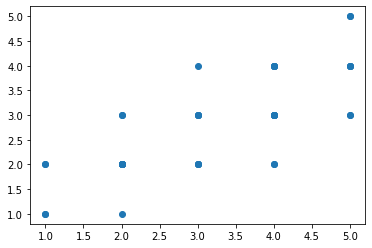

In [ ]:
plt.scatter(table_0["dish_impression"],table_0["willingness_to_buy"])

In [ ]:
#標準正規化
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
table_0_scaled=sc.fit_transform(table_0)
table_0_scaled=pd.DataFrame(data=table_0_scaled,columns=columns_0)
table_0_scaled

,price,brand_congnition,package_impression,dish_impression,willingness_to_buy
0,-0.264649,-0.890637,-1.137578,-0.200731,-0.841997
1,-0.264649,-0.890637,-1.137578,-0.200731,1.160591
2,-1.235027,-0.890637,-0.072611,-0.200731,0.159297
3,-0.264649,-0.890637,0.992355,0.602194,1.160591
4,-0.264649,-0.890637,-0.072611,0.602194,-0.841997
5,-0.264649,-0.890637,-0.072611,0.602194,0.159297
6,-0.264649,-0.890637,-0.072611,0.602194,0.159297
7,-0.264649,-0.890637,-0.072611,-0.200731,0.159297
8,-0.264649,-0.890637,-1.137578,0.602194,-0.841997
9,0.705730,-0.890637,0.992355,1.405119,1.160591


In [ ]:
X_0_scaled=np.array(table_0_scaled.loc[:,["price","brand_congnition","package_impression","dish_impression"]])
y_0_scaled=np.array(table_0_scaled.loc[:,"willingness_to_buy"])
reg_0_scaled = LinearRegression().fit(X_0_scaled, y_0_scaled)
print("係数は",reg_0_scaled.coef_)
print("切片は",reg_0_scaled.intercept_)

係数は [0.30113825 0.01194771 0.25399266 0.51532941]
切片は 2.174938297868323e-16


In [ ]:
table_0_result=pd.DataFrame(data=reg_0_scaled.coef_,index=["price","brand_congnition","package_impression","dish_impression"],columns=["willingness_to_buy"])
table_0_result

,willingness_to_buy
price,0.301138
brand_congnition,0.011948
package_impression,0.253993
dish_impression,0.515329


#分析1：肉の類似度に重要な項目の調査

説明変数：「料理の見た目の印象」,「肉との味の類似度」,「肉との食感の類似度」,「肉との匂いの類似度」


目的変数：「肉との類似度」

In [ ]:
#肉の類似性に関する、44行5列の行列を作成する。
columns_1=['dish_impression','taste_similarity','texture_similarity','smell_similarity','meat_similarity']
table_mogi_1=questionnaire_result.loc[:,['mogi_appetite','mogi_meat_taste_similarity','mogi_meat_texture_similarity','mogi_meat_smell_similarity','mogi_meat_similarity']]
table_mogi_1.columns=columns_1
table_mujirushi_1=questionnaire_result.loc[:,['mujirushi_appetite','mujirushi_meat_taste_similarity','mujirushi_meat_texture_similarity','mujirushi_meat_smell_similarity','mujirushi_meat_similarity']]
table_mujirushi_1.columns=columns_1
table_carlota_1=questionnaire_result.loc[:,['carlota_appetite','carlota_meat_taste_similarity','carlota_meat_texture_similarity','carlota_meat_smell_similarity','carlota_meat_similarity']]
table_carlota_1.columns=columns_1
table_topvalue_1=questionnaire_result.loc[:,['topvalue_appetite','topvalue_meat_taste_similarity','topvalue_meat_texture_similarity','topvalue_meat_smell_similarity','topvalue_meat_similarity']]
table_topvalue_1.columns=columns_1

In [ ]:
table_1=pd.concat([table_mogi_1,table_mujirushi_1,table_carlota_1,table_topvalue_1])

In [ ]:
table_1

,dish_impression,taste_similarity,texture_similarity,smell_similarity,meat_similarity
0,3,2,3,1,4
1,3,3,3,3,3
2,3,3,3,4,4
3,4,2,3,2,3
4,4,2,2,3,2
5,4,4,3,3,4
6,4,2,3,3,4
7,3,4,3,4,4
8,4,2,3,3,2
9,5,2,4,2,3


In [ ]:
#標準正規化
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
table_1_scaled=sc.fit_transform(table_1)
table_1_scaled=pd.DataFrame(data=table_1_scaled,columns=columns_1)
table_1_scaled.head()

,dish_impression,taste_similarity,texture_similarity,smell_similarity,meat_similarity
0,-0.200731,-0.21682,0.264649,-1.023487,1.220624
1,-0.200731,0.84319,0.264649,0.934488,0.354375
2,-0.200731,0.84319,0.264649,1.913475,1.220624
3,0.602194,-0.21682,0.264649,-0.044499,0.354375
4,0.602194,-0.21682,-0.705730,0.934488,-0.511875


In [ ]:
#重回帰分析
X_1_scaled=np.array(table_1_scaled.loc[:,['dish_impression','taste_similarity','texture_similarity','smell_similarity']])
y_1_scaled=np.array(table_1_scaled.loc[:,'meat_similarity'])
reg_1_scaled = LinearRegression().fit(X_1_scaled, y_1_scaled)
print("係数は",reg_1_scaled.coef_)
print("切片は",reg_1_scaled.intercept_)

係数は [ 0.14282994  0.48662053  0.37133236 -0.02896231]
切片は 1.7803677234721255e-18


In [ ]:
table_1_result=pd.DataFrame(data=reg_1_scaled.coef_,index=['dish_impression','taste_similarity','texture_similarity','smell_similarity'],columns=['meat_similarity'])
table_1_result

,meat_similarity
dish_impression,0.142830
taste_similarity,0.486621
texture_similarity,0.371332
smell_similarity,-0.028962


#分析2：商品の美味しさに重要な項目調査

説明変数：「パサパサさ」,「ねちょねちょさ」,「ジューシーさ」,「しょっぱさ」,「旨味」,「味の濃さ」,「味の薄さ」,「原材料の味の強さ」,「原材料の匂いの強さ」,「肉との類似度」

目的変数：「美味しさ」


In [ ]:
columns_2=['appetite','dryness', 'stickiness', 'juicy', 'saltiness', 'seasoned_flavour', 'flavour_heaviness', 'flavour_lightness', 'soya_taste', 'soya_smell','meat_similarity','meat_taste_similarity','meat_texture_similarity','meat_smell_similarity', 'deliciousness']
table_mogi_2 = questionnaire_result.loc[:, ['mogi_appetite','mogi_dryness', 'mogi_stickiness', 'mogi_juicy', 'mogi_saltiness', 'mogi_seasoned_flavour', 'mogi_flavour_heaviness', 'mogi_flavour_lightness', 'mogi_soya_taste', 'mogi_soya_smell','mogi_meat_similarity','mogi_meat_taste_similarity','mogi_meat_texture_similarity','mogi_meat_smell_similarity', 'mogi_deliciousness']]
table_mogi_2.columns=columns_2
table_mujirushi_2 = questionnaire_result.loc[:, ['mujirushi_appetite','mujirushi_dryness', 'mujirushi_stickiness', 'mujirushi_juicy', 'mujirushi_saltiness', 'mujirushi_seasoned_flavour', 'mujirushi_flavour_heaviness', 'mujirushi_flavour_lightness', 'mujirushi_soya_taste', 'mujirushi_soya_smell','mujirushi_meat_similarity','mujirushi_meat_taste_similarity','mujirushi_meat_texture_similarity','mujirushi_meat_smell_similarity', 'mujirushi_deliciousness']]
table_mujirushi_2.columns=columns_2
table_carlota_2 = questionnaire_result.loc[:, ['carlota_appetite','carlota_dryness', 'carlota_stickiness', 'carlota_juicy', 'carlota_saltiness', 'carlota_seasoned_flavour', 'carlota_flavour_heaviness', 'carlota_flavour_lightness', 'carlota_quinoa_taste', 'carlota_quinoa_smell','carlota_meat_similarity','carlota_meat_taste_similarity','carlota_meat_texture_similarity','carlota_meat_smell_similarity', 'carlota_deliciousness']]
table_carlota_2.columns=columns_2
table_topvalue_2 = questionnaire_result.loc[:, ['topvalue_appetite','topvalue_dryness', 'topvalue_stickiness', 'topvalue_juicy', 'topvalue_saltiness', 'topvalue_seasoned_flavour', 'topvalue_flavour_heaviness', 'topvalue_flavour_lightness', 'topvalue_soya_taste', 'topvalue_soya_smell','topvalue_meat_similarity','topvalue_meat_taste_similarity','topvalue_meat_texture_similarity','topvalue_meat_smell_similarity', 'topvalue_deliciousness']]
table_topvalue_2.columns=columns_2

In [ ]:
table_2=pd.concat([table_mogi_2,table_mujirushi_2,table_carlota_2,table_topvalue_2])

In [ ]:
table_2

,appetite,dryness,stickiness,juicy,saltiness,seasoned_flavour,flavour_heaviness,flavour_lightness,soya_taste,soya_smell,meat_similarity,meat_taste_similarity,meat_texture_similarity,meat_smell_similarity,deliciousness
0,3,2,3,1,3,2,2,1,2,3,4,2,3,1,4
1,3,3,3,3,3,2,1,1,3,3,3,3,3,3,4
2,3,3,3,2,3,2,1,2,3,3,4,3,3,4,4
3,4,3,3,3,2,3,2,1,3,3,3,2,3,2,4
4,4,2,3,1,3,2,1,3,3,2,2,2,2,3,5
5,4,3,3,2,2,2,1,3,3,3,4,4,3,3,4
6,4,3,3,2,2,3,2,1,3,3,4,2,3,3,4
7,3,3,3,2,3,2,1,1,3,3,4,4,3,4,4
8,4,3,3,2,3,2,1,2,3,3,2,2,3,3,3
9,5,3,3,3,3,3,1,1,3,3,3,2,4,2,4


In [ ]:
#標準正規化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

table_2_scaled=sc.fit_transform(table_2)
table_2_scaled=pd.DataFrame(data=table_2_scaled,columns=columns_2)

In [ ]:
#重回帰分析

X_2_scaled=np.array(table_2_scaled.loc[:,[ 'juicy', 'saltiness', 'seasoned_flavour', 'flavour_heaviness','soya_taste','meat_similarity']])
y_2_scaled=np.array(table_2_scaled.loc[:,"deliciousness"])
reg_2_scaled = LinearRegression().fit(X_2_scaled, y_2_scaled)
print("係数は",reg_2_scaled.coef_)
print("切片は",reg_2_scaled.intercept_)

係数は [ 0.10685566  0.1063597   0.26061503 -0.18497285 -0.00909472  0.5129567 ]
切片は 8.894416621884173e-17


In [ ]:
table_2_result=pd.DataFrame(data=reg_2_scaled.coef_,index=[ 'juicy', 'saltiness', 'seasoned_flavour', 'flavour_heaviness','soya_taste','meat_similarity'],columns=["deliciousness"])
table_2_result

,deliciousness
juicy,0.106856
saltiness,0.106360
seasoned_flavour,0.260615
flavour_heaviness,-0.184973
soya_taste,-0.009095
meat_similarity,0.512957


#分析3：人の特性と美味しいと感じる代替肉には関係がある

説明変数：(商品ごとの)[甘さ嗜好度、辛さ嗜好度、しょっぱさ嗜好度、旨味嗜好度、苦味嗜好度、薄味嗜好度、濃い味嗜好度、大豆嗜好度、野菜嗜好度、肉嗜好度、油嗜好度、健康志向度]


目的変数：(商品ごとの)[美味しさ]

In [ ]:
table_mogi_3_scaled = questionnaire_result_scaled.loc[:, [ 'sweet_fondness', 'spicy_fondness', 'salty_fondness', 'seasoned_flavour_fondness', 'bitter_fondness', 'light_seasoning_fondness', 'heavy_seasoning_fondness', 'soya_bean_fondness', 'vegetable_fondness', 'meat_fondness','oily_fondness','health_awareness','mogi_deliciousness']]
table_mujirushi_3_scaled = questionnaire_result_scaled.loc[:, [ 'sweet_fondness', 'spicy_fondness', 'salty_fondness', 'seasoned_flavour_fondness', 'bitter_fondness', 'light_seasoning_fondness', 'heavy_seasoning_fondness', 'soya_bean_fondness', 'vegetable_fondness', 'meat_fondness','oily_fondness','health_awareness','mujirushi_deliciousness']]
table_carlota_3_scaled = questionnaire_result_scaled.loc[:, [ 'sweet_fondness', 'spicy_fondness', 'salty_fondness', 'seasoned_flavour_fondness', 'bitter_fondness', 'light_seasoning_fondness', 'heavy_seasoning_fondness', 'soya_bean_fondness', 'vegetable_fondness', 'meat_fondness','oily_fondness','health_awareness','carlota_deliciousness']]
table_topvalue_3_scaled = questionnaire_result_scaled.loc[:, [ 'sweet_fondness', 'spicy_fondness', 'salty_fondness', 'seasoned_flavour_fondness', 'bitter_fondness', 'light_seasoning_fondness', 'heavy_seasoning_fondness', 'soya_bean_fondness', 'vegetable_fondness', 'meat_fondness','oily_fondness','health_awareness', 'topvalue_deliciousness']]

In [ ]:
X_3_scaled=np.array(table_mogi_3_scaled.loc[:,['sweet_fondness', 'spicy_fondness', 'salty_fondness', 'seasoned_flavour_fondness', 'bitter_fondness', 'light_seasoning_fondness', 'heavy_seasoning_fondness', 'soya_bean_fondness', 'vegetable_fondness', 'meat_fondness','oily_fondness','health_awareness']])

茂木食品

In [ ]:
y_mogi_scaled=np.array(table_mogi_3_scaled.loc[:,"mogi_deliciousness"])
reg_3_mogi_scaled = LinearRegression().fit(X_3_scaled, y_mogi_scaled)
print("係数は",reg_3_mogi_scaled.coef_)
print("切片は",reg_3_mogi_scaled.intercept_)

係数は [ 1.05848914 -0.2292812  -1.37279736 -0.13976745 -0.6213074  -0.24148481
 -0.11857421  1.26374668 -0.76087526  0.15130201 -0.46713082  1.12324026]
切片は -6.25589773945826e-16


In [ ]:
table_3_mogi_result=pd.DataFrame(reg_3_mogi_scaled.coef_,index=['sweet_fondness', 'spicy_fondness', 'salty_fondness', 'seasoned_flavour_fondness', 'bitter_fondness', 'light_seasoning_fondness', 'heavy_seasoning_fondness', 'soya_bean_fondness', 'vegetable_fondness', 'meat_fondness','oily_fondness','health_awareness'],columns=["mogi_deliciousness"])
table_3_mogi_result

,mogi_deliciousness
sweet_fondness,1.058489
spicy_fondness,-0.229281
salty_fondness,-1.372797
seasoned_flavour_fondness,-0.139767
bitter_fondness,-0.621307
light_seasoning_fondness,-0.241485
heavy_seasoning_fondness,-0.118574
soya_bean_fondness,1.263747
vegetable_fondness,-0.760875
meat_fondness,0.151302


無印良品

In [ ]:
y_mujirushi_scaled=np.array(table_mujirushi_3_scaled.loc[:,"mujirushi_deliciousness"])
reg_3_mujirushi_scaled = LinearRegression().fit(X_3_scaled, y_mujirushi_scaled)
print("係数は",reg_3_mujirushi_scaled.coef_)
print("切片は",reg_3_mujirushi_scaled.intercept_)

係数は [-0.0474631   0.05137591  0.68084023 -0.3320366   0.02301449  0.10457051
 -0.72843972 -0.28879549  0.61507079 -0.03424957  0.55162355  0.09521907]
切片は -4.0185014675868964e-17


In [ ]:
table_3_mujirushi_result=pd.DataFrame(reg_3_mujirushi_scaled.coef_,index=['sweet_fondness', 'spicy_fondness', 'salty_fondness', 'seasoned_flavour_fondness', 'bitter_fondness', 'light_seasoning_fondness', 'heavy_seasoning_fondness', 'soya_bean_fondness', 'vegetable_fondness', 'meat_fondness','oily_fondness','health_awareness'],columns=["mujirushi_deliciousness"])
table_3_mujirushi_result

,mujirushi_deliciousness
sweet_fondness,-0.047463
spicy_fondness,0.051376
salty_fondness,0.680840
seasoned_flavour_fondness,-0.332037
bitter_fondness,0.023014
light_seasoning_fondness,0.104571
heavy_seasoning_fondness,-0.728440
soya_bean_fondness,-0.288795
vegetable_fondness,0.615071
meat_fondness,-0.034250


carlota(カルロタ)

In [ ]:
y_carlota_scaled=np.array(table_carlota_3_scaled.loc[:,"carlota_deliciousness"])
reg_3_carlota_scaled = LinearRegression().fit(X_3_scaled, y_carlota_scaled)
print("係数は",reg_3_carlota_scaled.coef_)
print("切片は",reg_3_carlota_scaled.intercept_)

係数は [ 0.56413678 -1.29084672 -0.10658114 -0.12479397  0.72070456 -1.36366141
  1.45464276  1.35602642  0.62277426  0.69330516 -1.43740651 -0.78130101]
切片は -7.416547253677339e-16


In [ ]:
table_3_carlota_result=pd.DataFrame(reg_3_carlota_scaled.coef_,index=['sweet_fondness', 'spicy_fondness', 'salty_fondness', 'seasoned_flavour_fondness', 'bitter_fondness', 'light_seasoning_fondness', 'heavy_seasoning_fondness', 'soya_bean_fondness', 'vegetable_fondness', 'meat_fondness','oily_fondness','health_awareness'],columns=["carlota_deliciousness"])
table_3_carlota_result

,carlota_deliciousness
sweet_fondness,0.564137
spicy_fondness,-1.290847
salty_fondness,-0.106581
seasoned_flavour_fondness,-0.124794
bitter_fondness,0.720705
light_seasoning_fondness,-1.363661
heavy_seasoning_fondness,1.454643
soya_bean_fondness,1.356026
vegetable_fondness,0.622774
meat_fondness,0.693305


イオン topvalue

In [ ]:
y_topvalue_scaled=np.array(table_topvalue_3_scaled.loc[:,"topvalue_deliciousness"])
reg_3_topvalue_scaled = LinearRegression().fit(X_3_scaled, y_topvalue_scaled)
print("係数は",reg_3_topvalue_scaled.coef_)
print("切片は",reg_3_topvalue_scaled.intercept_)

係数は [-0.14970279 -0.53097374  0.23020751  0.88032123  0.33742371  0.04703004
 -0.02068475  0.35286879  0.00257029  0.18377129 -0.20624575 -0.63735799]
切片は -3.5899837799063915e-16


In [ ]:
table_3_topvalue_result=pd.DataFrame(reg_3_topvalue_scaled.coef_,index=['sweet_fondness', 'spicy_fondness', 'salty_fondness', 'seasoned_flavour_fondness', 'bitter_fondness', 'light_seasoning_fondness', 'heavy_seasoning_fondness', 'soya_bean_fondness', 'vegetable_fondness', 'meat_fondness','oily_fondness','health_awareness'],columns=["topvalue_deliciousness"])
table_3_topvalue_result

,topvalue_deliciousness
sweet_fondness,-0.149703
spicy_fondness,-0.530974
salty_fondness,0.230208
seasoned_flavour_fondness,0.880321
bitter_fondness,0.337424
light_seasoning_fondness,0.047030
heavy_seasoning_fondness,-0.020685
soya_bean_fondness,0.352869
vegetable_fondness,0.002570
meat_fondness,0.183771


#分析4：その商品を購入したいと思うために重要な項目の調査


説明変数：[価格の安さ、ブランド認識度、パッケージの印象、料理の見た目の印象、食前の段階での購買意欲、パサパサさ、ねちょねちょさ、ジューシーさ、しょっぱさ、旨味、味の濃さ、味の薄さ、原材料の味の強さ、原材料の匂いの強さ、肉との類似度、肉との味の類似度、肉との食感の類似度、肉との匂いの類似度、美味しさ]

目的変数：(商品ごとの)[食後の段階での購買意欲]

In [ ]:
columns_4=['soya_bean_fondness', 'vegetable_fondness', 'meat_fondness','oily_fondness','health_awareness', 'fake_meat_impression', 'fake_meat_cognition', 'environmental_awareness','price','brand_cognition','package_impression','appetite','dryness', 'stickiness', 'juicy', 'saltiness', 'seasoned_flavour', 'flavour_heaviness', 'flavour_lightness', 'soya_taste', 'soya_smell','meat_taste_similarity','meat_texture_similarity','meat_smell_similarity', 'deliciousness','willingness_to_buy_X']
table_mogi_4 = questionnaire_result.loc[:, ['soya_bean_fondness', 'vegetable_fondness', 'meat_fondness','oily_fondness','health_awareness', 'fake_meat_impression', 'fake_meat_cognition', 'environmental_awareness','mogi_price','mogi_brand_cognition','mogi_package_impression','mogi_appetite','mogi_dryness', 'mogi_stickiness', 'mogi_juicy', 'mogi_saltiness', 'mogi_seasoned_flavour', 'mogi_flavour_heaviness', 'mogi_flavour_lightness', 'mogi_soya_taste', 'mogi_soya_smell','mogi_meat_taste_similarity','mogi_meat_texture_similarity','mogi_meat_smell_similarity', 'mogi_deliciousness','willingness_to_buy_A'] ]
table_mogi_4.columns=columns_4
table_mujirushi_4 = questionnaire_result.loc[:, ['soya_bean_fondness', 'vegetable_fondness', 'meat_fondness','oily_fondness','health_awareness', 'fake_meat_impression', 'fake_meat_cognition', 'environmental_awareness','mujirushi_price','mujirushi_brand_cognition','mujirushi_package_impression','mujirushi_appetite','mujirushi_dryness', 'mujirushi_stickiness', 'mujirushi_juicy', 'mujirushi_saltiness', 'mujirushi_seasoned_flavour', 'mujirushi_flavour_heaviness', 'mujirushi_flavour_lightness', 'mujirushi_soya_taste', 'mujirushi_soya_smell','mujirushi_meat_taste_similarity','mujirushi_meat_texture_similarity','mujirushi_meat_smell_similarity', 'mujirushi_deliciousness','willingness_to_buy_B']]
table_mujirushi_4.columns=columns_4
table_carlota_4 = questionnaire_result.loc[:, ['soya_bean_fondness', 'vegetable_fondness', 'meat_fondness','oily_fondness','health_awareness', 'fake_meat_impression', 'fake_meat_cognition', 'environmental_awareness','carlota_price','carlota_brand_cognition','carlota_package_impression','carlota_appetite','carlota_dryness', 'carlota_stickiness', 'carlota_juicy', 'carlota_saltiness', 'carlota_seasoned_flavour', 'carlota_flavour_heaviness', 'carlota_flavour_lightness', 'carlota_quinoa_taste', 'carlota_quinoa_smell','carlota_meat_taste_similarity','carlota_meat_texture_similarity','carlota_meat_smell_similarity', 'carlota_deliciousness','willingness_to_buy_C'] ]
table_carlota_4.columns=columns_4
table_topvalue_4 = questionnaire_result.loc[:, ['soya_bean_fondness', 'vegetable_fondness', 'meat_fondness','oily_fondness','health_awareness', 'fake_meat_impression', 'fake_meat_cognition', 'environmental_awareness','topvalue_price','topvalue_brand_cognition','topvalue_package_impression','topvalue_appetite','topvalue_dryness', 'topvalue_stickiness', 'topvalue_juicy', 'topvalue_saltiness', 'topvalue_seasoned_flavour', 'topvalue_flavour_heaviness', 'topvalue_flavour_lightness', 'topvalue_soya_taste', 'topvalue_soya_smell','topvalue_meat_taste_similarity','topvalue_meat_texture_similarity','topvalue_meat_smell_similarity', 'topvalue_deliciousness','willingness_to_buy_D'] ]
table_topvalue_4.columns=columns_4

In [ ]:
#結合と正規標準化
table_4=pd.concat([table_mogi_4,table_mujirushi_4,table_carlota_4,table_topvalue_4])
table_4=sc.fit_transform(table_4)
table_4=pd.DataFrame(data=table_4,columns=columns_4)
table_4

,soya_bean_fondness,vegetable_fondness,meat_fondness,oily_fondness,health_awareness,fake_meat_impression,fake_meat_cognition,environmental_awareness,price,brand_cognition,...,seasoned_flavour,flavour_heaviness,flavour_lightness,soya_taste,soya_smell,meat_taste_similarity,meat_texture_similarity,meat_smell_similarity,deliciousness,willingness_to_buy_X
0,-1.095445,-0.581238,-0.912871,-0.471405,-0.340503,0.595880,0.392837,-0.316228,-0.264649,-0.890637,...,-0.166759,0.629941,-0.691564,-0.919640,0.660456,-0.21682,0.264649,-1.023487,0.733236,0.945373
1,-1.095445,0.697486,-0.912871,-1.335646,0.595880,-2.213267,-1.335646,-0.316228,-0.264649,-0.890637,...,-0.166759,-0.755929,-0.691564,0.698926,0.660456,0.84319,0.264649,0.934488,0.733236,0.228193
2,0.912871,0.697486,1.095445,0.392837,1.532262,0.595880,1.257079,3.162278,-1.235027,-0.890637,...,-0.166759,-0.755929,0.691564,0.698926,0.660456,0.84319,0.264649,1.913475,0.733236,0.228193
3,0.912871,0.697486,-0.912871,-0.471405,-1.276885,0.595880,0.392837,-0.316228,-0.264649,-0.890637,...,1.300723,0.629941,-0.691564,0.698926,0.660456,-0.21682,0.264649,-0.044499,0.733236,1.662552
4,0.912871,-1.859962,1.095445,1.257079,0.595880,-1.276885,1.257079,-0.316228,-0.264649,-0.890637,...,-0.166759,-0.755929,2.074692,0.698926,-0.723356,-0.21682,-0.705730,0.934488,1.539795,1.662552
5,0.912871,0.697486,1.095445,0.392837,-0.340503,-0.340503,-1.335646,-0.316228,-0.264649,-0.890637,...,-0.166759,-0.755929,2.074692,0.698926,0.660456,1.90320,0.264649,0.934488,0.733236,0.945373
6,-1.095445,-0.581238,-0.912871,0.392837,-1.276885,-0.340503,0.392837,-0.316228,-0.264649,-0.890637,...,1.300723,0.629941,-0.691564,0.698926,0.660456,-0.21682,0.264649,0.934488,0.733236,1.662552
7,0.912871,0.697486,-0.912871,0.392837,0.595880,0.595880,-0.471405,-0.316228,-0.264649,-0.890637,...,-0.166759,-0.755929,-0.691564,0.698926,0.660456,1.90320,0.264649,1.913475,0.733236,0.228193
8,-1.095445,-1.859962,1.095445,0.392837,-1.276885,-0.340503,-1.335646,-0.316228,-0.264649,-0.890637,...,-0.166759,-0.755929,0.691564,0.698926,0.660456,-0.21682,0.264649,0.934488,-0.073324,-1.206166
9,-1.095445,0.697486,1.095445,-2.199888,1.532262,0.595880,1.257079,-0.316228,0.705730,-0.890637,...,1.300723,-0.755929,-0.691564,0.698926,0.660456,-0.21682,1.235027,-0.044499,0.733236,0.945373


In [ ]:
#共通項目を削除した結果
#標準化を施した結果
X_4=np.array(table_4.loc[:,['price','brand_cognition','package_impression','appetite','appetite','dryness', 'stickiness', 'juicy', 'saltiness', 'seasoned_flavour', 'flavour_heaviness', 'flavour_lightness', 'soya_taste', 'soya_smell','meat_taste_similarity','meat_texture_similarity','meat_smell_similarity', 'deliciousness']])
y_4=np.array(table_4.loc[:,'willingness_to_buy_X'])
reg_4 = LinearRegression().fit(X_4, y_4)
print("係数は",reg_4.coef_)
print("切片は",reg_4.intercept_)

係数は [ 0.36915429 -0.3480803  -0.05272651  0.03134113  0.03134113  0.081993
  0.1050614  -0.06089102 -0.15293145 -0.03594813  0.10575299  0.01322855
 -0.1477283   0.01341495  0.05279752 -0.02930502 -0.09730399  0.76163285]
切片は 1.4622735134708725e-16


In [ ]:
table_4_result=pd.DataFrame(reg_4.coef_,index=['price','brand_cognition','package_impression','appetite','appetite','dryness', 'stickiness', 'juicy', 'saltiness', 'seasoned_flavour', 'flavour_heaviness', 'flavour_lightness', 'soya_taste', 'soya_smell','meat_taste_similarity','meat_texture_similarity','meat_smell_similarity', 'deliciousness'] ,columns=['willingness_to_buy_X'])
table_4_result

,willingness_to_buy_X
price,0.369154
brand_cognition,-0.348080
package_impression,-0.052727
appetite,0.031341
appetite,0.031341
dryness,0.081993
stickiness,0.105061
juicy,-0.060891
saltiness,-0.152931
seasoned_flavour,-0.035948


#分析5：今後任意の代替肉製品を購入したいと思うために重要な項目の調査

説明変数：・[大豆嗜好度、野菜嗜好度、肉嗜好度、油嗜好度、健康志向度、代替肉の印象、代替肉の理解、環境配慮度]

目的変数：[代替肉製品を今後買いたいと思うか]

In [ ]:
#正規標準化
X_5=np.array(questionnaire_result_scaled.loc[:,['soya_bean_fondness', 'vegetable_fondness', 'meat_fondness','oily_fondness','health_awareness', 'fake_meat_impression', 'fake_meat_cognition', 'environmental_awareness']])
y_5=np.array(questionnaire_result_scaled.loc[:,'willingness_to_buy_fake_meat'])
reg_5 = LinearRegression().fit(X_5, y_5)
print("係数は",reg_5.coef_)
print("切片は",reg_5.intercept_)

係数は [-0.0309878   1.2178359   0.04853495  0.76636062 -0.75679246 -0.58456252
  1.05332111 -0.21355002]
切片は 1.3349906556590497e-16


In [ ]:
table_5_result=pd.DataFrame(reg_5.coef_,index=['soya_bean_fondness', 'vegetable_fondness', 'meat_fondness','oily_fondness','health_awareness', 'fake_meat_impression', 'fake_meat_cognition', 'environmental_awareness'] ,columns=['willingness_to_buy_fake_meat'])
table_5_result

,willingness_to_buy_fake_meat
soya_bean_fondness,-0.030988
vegetable_fondness,1.217836
meat_fondness,0.048535
oily_fondness,0.766361
health_awareness,-0.756792
fake_meat_impression,-0.584563
fake_meat_cognition,1.053321
environmental_awareness,-0.213550


#いくつかの項目同士の相関係数

「肉との類似度」と「美味しさ」の相関係数

In [ ]:
columns_meat_deli=['meat_similarity','deliciousness']
table_mogi_meat_deli=questionnaire_result.loc[:,['mogi_meat_similarity','mogi_deliciousness']]
table_mogi_meat_deli.columns=columns_meat_deli
table_mujirushi_meat_deli=questionnaire_result.loc[:,['mujirushi_meat_similarity','mujirushi_deliciousness']]
table_mujirushi_meat_deli.columns=columns_meat_deli
table_carlota_meat_deli=questionnaire_result.loc[:,['carlota_meat_similarity','carlota_deliciousness']]
table_carlota_meat_deli.columns=columns_meat_deli
table_topvalue_meat_deli=questionnaire_result.loc[:,['topvalue_meat_similarity','topvalue_deliciousness']]
table_topvalue_meat_deli.columns=columns_meat_deli

In [ ]:
table_meat_deli=pd.concat([table_mogi_meat_deli,table_mujirushi_meat_deli,table_carlota_meat_deli,table_topvalue_meat_deli])
table_meat_deli

,meat_similarity,deliciousness
0,4,4
1,3,4
2,4,4
3,3,4
4,2,5
5,4,4
6,4,4
7,4,4
8,2,3
9,3,4


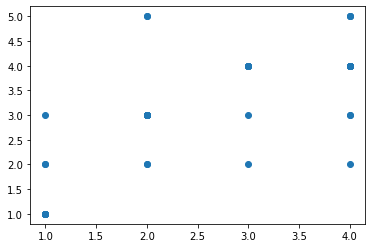

In [ ]:
plt.scatter(table_3.loc[:,"meat_similarity"],table_3.loc[:,"deliciousness"])

In [ ]:
X=np.array(table_meat_deli.loc[:,["meat_similarity"]])
y=np.array(table_meat_deli.loc[:,["deliciousness"]])

In [ ]:
#商品の肉との類似度と商品の美味しさの相関係数
np.corrcoef(X.T[0].astype(np.int32),y.T[0].astype(np.int32))

array([[1.        , 0.70878606],
       [0.70878606, 1.        ]])

肉との類似度と肉の味との類似度の相関係数

In [ ]:
columns_taste_meat=['meat_taste_similarity','meat_similarity']
table_mogi_taste_meat=questionnaire_result.loc[:,['mogi_meat_taste_similarity','mogi_meat_similarity']]
table_mogi_taste_meat.columns=columns_taste_meat
table_mujirushi_taste_meat=questionnaire_result.loc[:,['mujirushi_meat_taste_similarity','mujirushi_meat_similarity']]
table_mujirushi_taste_meat.columns=columns_taste_meat
table_carlota_taste_meat=questionnaire_result.loc[:,['carlota_meat_taste_similarity','carlota_meat_similarity']]
table_carlota_taste_meat.columns=columns_taste_meat
table_topvalue_taste_meat=questionnaire_result.loc[:,['topvalue_meat_taste_similarity','topvalue_meat_similarity']]
table_topvalue_taste_meat.columns=columns_taste_meat
table_taste_meat=pd.concat([table_mogi_taste_meat,table_mujirushi_taste_meat,table_carlota_taste_meat,table_topvalue_taste_meat])
X=np.array(table_taste_meat.loc[:,["meat_taste_similarity"]])
y=np.array(table_taste_meat.loc[:,["meat_similarity"]])
np.corrcoef(X.T[0].astype(np.int32),y.T[0].astype(np.int32))

array([[1.       , 0.7655103],
       [0.7655103, 1.       ]])

肉との類似度と肉の食感との類似度の相関係数

In [ ]:
columns_tex_meat=['meat_texture_similarity','meat_similarity']
table_mogi_tex_meat=questionnaire_result.loc[:,['mogi_meat_texture_similarity','mogi_meat_similarity']]
table_mogi_tex_meat.columns=columns_tex_meat
table_mujirushi_tex_meat=questionnaire_result.loc[:,['mujirushi_meat_texture_similarity','mujirushi_meat_similarity']]
table_mujirushi_tex_meat.columns=columns_tex_meat
table_carlota_tex_meat=questionnaire_result.loc[:,['carlota_meat_texture_similarity','carlota_meat_similarity']]
table_carlota_tex_meat.columns=columns_tex_meat
table_topvalue_tex_meat=questionnaire_result.loc[:,['topvalue_meat_texture_similarity','topvalue_meat_similarity']]
table_topvalue_tex_meat.columns=columns_tex_meat
table_tex_meat=pd.concat([table_mogi_tex_meat,table_mujirushi_tex_meat,table_carlota_tex_meat,table_topvalue_tex_meat])
X=np.array(table_tex_meat.loc[:,["meat_texture_similarity"]])
y=np.array(table_tex_meat.loc[:,["meat_similarity"]])
np.corrcoef(X.T[0].astype(np.int32),y.T[0].astype(np.int32))

array([[1.        , 0.72770039],
       [0.72770039, 1.        ]])